# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/data.csv')

In [2]:
# Составляю первое представление о данных 
df.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
# пришло время получить общую информацию о данных в таблице df
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице двенадцать столбцов (12) и  21525 !!! строк. Тип данных в пяти столбцах — `object`. Тип данных в пяти столбцах - `int64`. В оставшихся двух столбцах тип данных - `float64`.

Согласно документации к данным:
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;  
* `dob_years` — возраст клиента в годах;
* `education` —  уровень образования клиента;
* `education_id` — идентификатор уровня образования;
* `family_status` — идентификатор семейного положения;
* `family_status_id` — айди семейного положения;
* `gender` — пол клиента;
* `income_type` — тип занятости;
* `debt` — имел ли задолженность по возврату кредитов;
* `total_income` — ежемесячный доход;
* `purpose` — цель получения кредита.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 

**Вывод**

*Отсутсвуют данные - 'user_id', позволяющие идентифицировать каждого отедельного клиента.*  

*Предварительно можно утверждать, что данных достаточно для проверки гипотезы. Но встречаются пропуски в данных, а в последовательности колонок — расхождения с хорошим стилем.*

*Чтобы двигаться дальше, нужно устранить проблемы в данных.
Названия столбцов не содержат критических замечаний.*

In [4]:
# попробуем найти аномалии с помощью инструментов визуализация данных
import matplotlib.pyplot as plt
plt.style.use('ggplot')

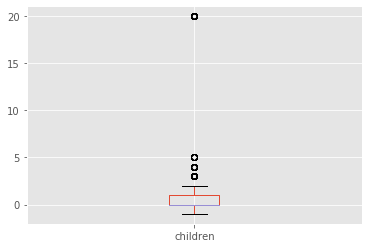

In [5]:
# используем диаграмму размаха
df['children'].plot(kind='box')
plt.show()

In [6]:
# устраним выявленные аномалии
df['children'] = df['children'].replace(20, 2)
df['children'] = df['children'].replace(-1, 0)

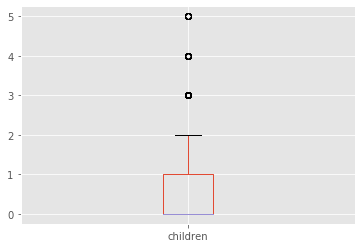

In [7]:
# проверим
df['children'].plot(kind='box')
plt.show()

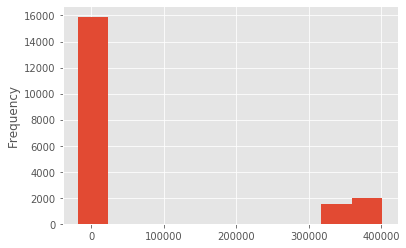

In [8]:
# к столбцу 'days_employed' применим гистограмму
df['days_employed'].plot(kind='hist')
plt.show()

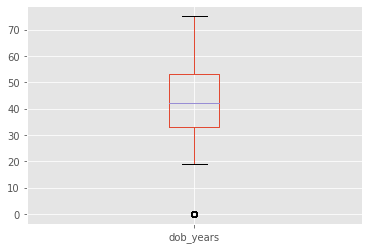

In [9]:
# к столбцу dob_years применим ящик с усами :)
df['dob_years'].plot(kind='box')
plt.show()

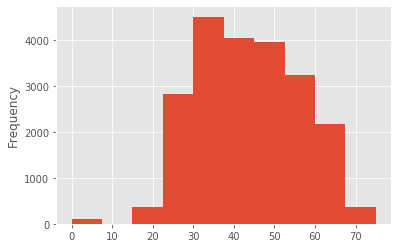

In [10]:
# тепловая карта тоже это демонстрирует, видно выбивающийся 'островок'.
df['dob_years'].plot(kind='hist')
plt.show()

In [11]:
# следующий столбец 'education' уровень образования клиента носит тип object, к такому типу данных лучше применить:
# метод unique() и groupby ()
print(df['education'].unique())
df.groupby('education')['education'].count()

['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']


education
ВЫСШЕЕ                   274
Высшее                   268
НАЧАЛЬНОЕ                 17
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
Начальное                 15
Неоконченное высшее       47
СРЕДНЕЕ                  772
Среднее                  711
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
высшее                  4718
начальное                250
неоконченное высшее      668
среднее                13750
ученая степень             4
Name: education, dtype: int64

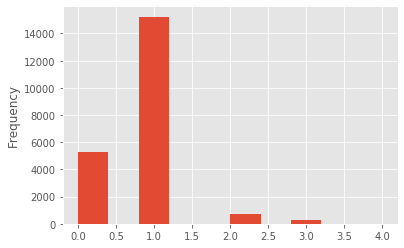

In [12]:
# следующий столбец 'education_id' уникальное значение уровня образования
# попробуем посмотреть на данные с помощью тепловой карты
df['education_id'].plot(kind='hist')
plt.show()

In [13]:
# зучим столбец 'family_status', по типу данных данный столбец относится к object, следовательно применяем подсчет повтороний.
# использую метод value_counts()
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [14]:
# проверим на соответстсвие количество строк
df['family_status'].value_counts().sum()

21525

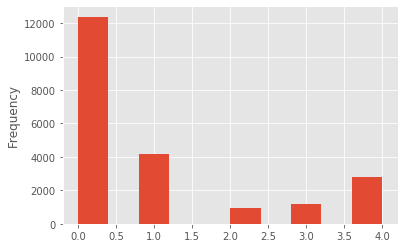

In [15]:
# столбец family_status_id проверим с помощью тепловой карты
df['family_status_id'].plot(kind='hist')
plt.show()

In [16]:
# посмотрим аномалии в столбце 'gender' пол
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [17]:
# посмотрим аномалии в столбце 'income_type'  тип занятости.
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

<div class="alert alert-info"> <b>Комментарий студента:</b> аномалии не замечены в столбце 'income_type' </div>

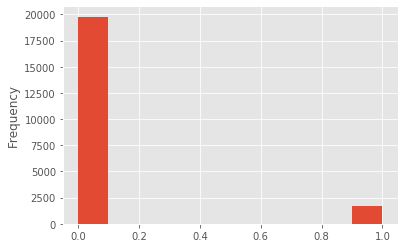

In [18]:
# посмотрим аномалии в столбце 'debt'  задолженность по возврату кредитов.
df['debt'].plot(kind='hist')
plt.show()


<div class="alert alert-info"> <b>Комментарий студента:</b> аномалии не замечены в столбце 'debt' </div>

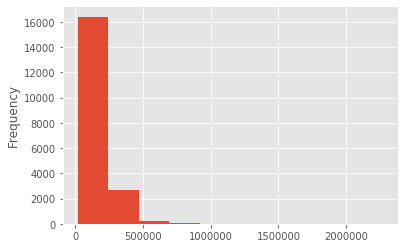

In [19]:
# посмотрим аномалии в столбце 'total_income' ежемесячный доход.
df['total_income'].plot(kind='hist')
plt.show()

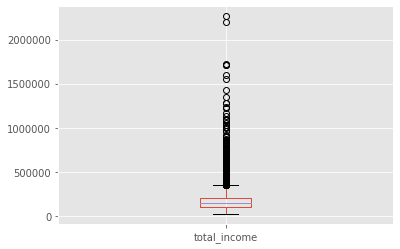

In [20]:
# к столбцу dob_years применим ящик с усами :)
df['total_income'].plot(kind='box')
plt.show()

In [21]:
# посмотрим аномалии в столбце 'purpose'.
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

**Вывод**

*Из общего количества столбцов в количестве 12 шт. аномалии установлены в 4 столбцах - 'children', 'days_employed', 'dob_years' и 'gender'. Очевидные аномалии устранены.* 

## Шаг 2. Предобработка данных

### Обработка пропусков

In [22]:
 # проведем подсчёт пропусков
(df.isna().sum()) 

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

<div class="alert alert-info">
<b>Комментарий:</b> В атрибутах "days_employed"(общий трудовой стаж в днях) обнаружены 2174 пропуска и "total_income"(ежемесячный доход) также 2174 пропуска. Перечисленные атрибуты относятся к количественным переменным, следовательно есть возможность сравнения. Пропуски в таких переменных заполняют характерными значениями. Это значения, характеризующие состояние выборки, — набора данных, выбранных для проведения исследования. Чтобы примерно оценить типичные значения выборки, годятся среднее арифметическое или медиана. Прежде всего, нужно ответить на вопрос, существует ли закономерность в появлении пропусков. Иными словами, не случайно ли их возникновение в наборе данных.
<br>
</div>

In [23]:
# проверим количество 'nan'  в дата фрейме "days_employed"
print('NaN occurrences in DataFrame:')
df.isna().sum().sum()

NaN occurrences in DataFrame:


4348

<div class="alert alert-info">
<b>Комментарий:</b> Дата фрейм содержит  значений nan - 4348, что соответствует общей сумме результатов пропущенных значений, поскольку nan - это 'не число' удалив строки с nan, мы лишим себя почти 1/5 данных: 4348 / 21525 = 20,2 %. Это может негативно повлиять на метрики и выводы исследования. В дальнейшем в работе предлагается заменить 'nan' на медиану.
    <br>
</div>

In [24]:
# убедимся, что 'nan' содержится в столбце датафрейма 'days_employed'
df['days_employed'].isna().sum()

2174

In [25]:
# убедимся, что 'nan' содержится в столбце датафрейма 'total_income'
df['total_income'].isna().sum()

2174

<div class="alert alert-info">
<b>Комментарий:</b> В атрибутах "days_employed"(общий трудовой стаж в днях) обнаружены 2174 'nan' и "total_income"(ежемесячный доход) также 2174 'nan'.
    <br>
</div>

<div class="alert alert-info">
<b>Комментарий:</b> 18_12_2021. Люди, занимающие руководящие должности и/или получившие образование в престижном вузе чаще, чем другие респонденты, не отвечают на вопрос о своих доходах и общем трудовом стаже. Поскольку занимаемая должность и образование сильно коррелируют с доходами, то в таком случае пропуски в поле доходы уже нельзя считать совершенно случайными, то есть говорить о случае MCAR не представляется возможным.
Если в наборе данных есть информация об образовании и должности респондентов, то зависимость между повышенной вероятностью пропуска в графе доходов и этой информацией может быть выражена математически, следовательно, выполняется гипотеза MAR. В случае MAR исключение пропусков вполне приемлемо. Гипотеза MAR (Missing At Random) значит, что на практике данные обычно пропущены не случайно, а ввиду некоторых закономерностей. 
    <br>
</div>

In [26]:
# предлагается заменить значения 'nan' на медиану
median_days_employed = df['days_employed'].median(skipna=True)

In [27]:
df['days_employed'] = df.days_employed.fillna(median_days_employed)

In [28]:
# убедимся, что 'nan' заменен на медиану в столбце датафрейма 'days_employed'
df['days_employed'].isna().sum()

0

In [29]:
display(df.head(15))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


<div class="alert alert-info">
<b>Комментарий:</b> В атрибуте "days_employed"(общий трудовой стаж в днях) обнаруженные 2174 'nan'  заменены на медианные значения.
    <br>
</div>

In [30]:
# проделаем такую же работу со столбцом 'total_income' в датафрейме, заменим 'nan' на медианные значения
median_total_income = df['total_income'].median(skipna=True)

In [31]:
df['total_income'] = df.total_income.fillna(median_total_income)

In [32]:
# убедимся, что 'nan' заменен на медиану в столбце датафрейма 'total_income'
df['total_income'].isna().sum()

0

In [33]:
display(df.head(15))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


<div class="alert alert-info">
<b>Комментарий:</b> В атрибуте "total_income" (ежемесячный доход) обнаруженные 2174 'nan'  заменены на медианные значения.
    <br>
</div>

In [34]:
# для предварительной подготовки к исследованию данных приведем все данные в датасете к нижнему регистру
df = df.astype(str).apply(lambda x: x.str.lower())

In [35]:
# проверим, получилось ли привести датасет к нижнему регистру
display(df.head(15))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673027760233,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875.6394525987,покупка жилья
1,1,-4024.803753850451,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080.01410244203,приобретение автомобиля
2,0,-5623.422610230956,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885.95229686378,покупка жилья
3,3,-4124.747206540018,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628.5503294142,дополнительное образование
4,0,340266.07204682194,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616.07787006293,сыграть свадьбу
5,0,-926.1858308789183,27,высшее,0,гражданский брак,1,m,компаньон,0,255763.56541904988,покупка жилья
6,0,-2879.202052139952,43,высшее,0,женат / замужем,0,f,компаньон,0,240525.9719203061,операции с жильем
7,0,-152.7795691752705,50,среднее,1,женат / замужем,0,m,сотрудник,0,135823.93419727974,образование
8,2,-6929.865298973741,35,высшее,0,гражданский брак,1,f,сотрудник,0,95856.83242386373,на проведение свадьбы
9,0,-2188.7564450779378,41,среднее,1,женат / замужем,0,m,сотрудник,0,144425.93827708642,покупка жилья для семьи


<div class="alert alert-info">
<b>Комментарий:</b> Дата сет приведен к нижнему регистру.
    <br>
</div>

In [36]:
# сначала приведем все данные во фреймах данных 'days_employed' и 'total_income' в тип float 
df[['days_employed','total_income']] = df[['days_employed','total_income']].astype(float)

In [37]:
# теперь попробуем преобразовать во фреймах данных 'days_employed' и 'total_income' с float на int 
df[['days_employed','total_income']] = df[['days_employed','total_income']].astype(int)

In [38]:
# проверим, получилось ли привести в нужные типы данных int
display(df.head(15))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,покупка жилья
1,1,-4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,приобретение автомобиля
2,0,-5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,покупка жилья
3,3,-4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,сыграть свадьбу
5,0,-926,27,высшее,0,гражданский брак,1,m,компаньон,0,255763,покупка жилья
6,0,-2879,43,высшее,0,женат / замужем,0,f,компаньон,0,240525,операции с жильем
7,0,-152,50,среднее,1,женат / замужем,0,m,сотрудник,0,135823,образование
8,2,-6929,35,высшее,0,гражданский брак,1,f,сотрудник,0,95856,на проведение свадьбы
9,0,-2188,41,среднее,1,женат / замужем,0,m,сотрудник,0,144425,покупка жилья для семьи


<div class="alert alert-info">
<b>Комментарий:</b> В атрибуте "days_employed"(общий трудовой стаж в днях) отрицательные числа соотнесены в положительные.
    <br>
</div>

In [39]:
# теперь попробуем устранить отрицательные значения во фрейме данных 'days_employed'
df['days_employed'] = df['days_employed'].abs()

In [40]:
# проверим, получилось ли привести в нужные типы данных int
display(df.head(15))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,m,компаньон,0,255763,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,f,компаньон,0,240525,операции с жильем
7,0,152,50,среднее,1,женат / замужем,0,m,сотрудник,0,135823,образование
8,2,6929,35,высшее,0,гражданский брак,1,f,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,m,сотрудник,0,144425,покупка жилья для семьи


<div class="alert alert-info">
<b>Комментарий:</b> В атрибуте "total_income" отрицательные числа соотнесены в положительные.
    <br>
</div>

In [41]:
# добавим столбец id_client
df['id_client'] = df.reset_index().index

### Замена типа данных

In [42]:
# изменим для удобства в работе расположение столбцов
df = df[['id_client','dob_years', 'gender','total_income', 'debt', 'children','education_id', 'education', 'days_employed', 'income_type', 'purpose', 'family_status_id', 'family_status']]

In [43]:
# проверим
display(df.head())

,id_client,dob_years,gender,total_income,debt,children,education_id,education,days_employed,income_type,purpose,family_status_id,family_status
0,0,42,f,253875,0,1,0,высшее,8437,сотрудник,покупка жилья,0,женат / замужем
1,1,36,f,112080,0,1,1,среднее,4024,сотрудник,приобретение автомобиля,0,женат / замужем
2,2,33,m,145885,0,0,1,среднее,5623,сотрудник,покупка жилья,0,женат / замужем
3,3,32,m,267628,0,3,1,среднее,4124,сотрудник,дополнительное образование,0,женат / замужем
4,4,53,f,158616,0,0,1,среднее,340266,пенсионер,сыграть свадьбу,1,гражданский брак


In [44]:
# посмотрим все ли в порядке в таблице df
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
id_client           21525 non-null int64
dob_years           21525 non-null object
gender              21525 non-null object
total_income        21525 non-null int64
debt                21525 non-null object
children            21525 non-null object
education_id        21525 non-null object
education           21525 non-null object
days_employed       21525 non-null int64
income_type         21525 non-null object
purpose             21525 non-null object
family_status_id    21525 non-null object
family_status       21525 non-null object
dtypes: int64(3), object(10)
memory usage: 2.1+ MB


<div class="alert alert-info">
<b>Комментарий:</b> Представляется, что таблица приобрела более читаемый вид, но столбцы dob_years, children, education_id family_status_id debt должны иметь тип данных int.
    <br>
</div>

In [45]:
df[['dob_years','children', 'education_id', 'debt', 'family_status_id']] = df[['dob_years','children','education_id', 'debt', 'family_status_id']].astype(int)

In [46]:
# проверим еще раз
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
id_client           21525 non-null int64
dob_years           21525 non-null int64
gender              21525 non-null object
total_income        21525 non-null int64
debt                21525 non-null int64
children            21525 non-null int64
education_id        21525 non-null int64
education           21525 non-null object
days_employed       21525 non-null int64
income_type         21525 non-null object
purpose             21525 non-null object
family_status_id    21525 non-null int64
family_status       21525 non-null object
dtypes: int64(8), object(5)
memory usage: 2.1+ MB


In [47]:
# с учетом обнаруженной ошибки в работе над разделом категоризации необходимо устранить ошибку во фрейме данных children, уберем отрицательные значения
df['children'] = df['children'].abs()

### Обработка дубликатов

In [48]:
# рассмотреим дата сет на предмет наличия явных дубликатов
(df.duplicated().sum())

0

**Вывод**
18_12_2021 - По результатам предобработки данных установлено следующее:
1) Дата фрейм содержит значений nan - 4348, установлена симетричность данных nan в столбцах (общий трудовой стаж в днях) и (ежемесячном доходе). Это позволяет сделать заключение, что NaN ('не число') пропущено не случайно, а ввиду некоторых закономерностей.

2) 1/5 данных содержало значение NaN. Их удаление негативно могло повлиять на метрики и выводы исследования. По этой причине в работе произошла замена значения 'nan' на медиану.

3) Проделана работа по приведению данных к единым требованиям в части стиля их оформления, что является важной частью для обеспечения релевантности итоговых показателей. Например, удалены отрицательные значения там где они не приемлемы, обеспечен нижний регистр написания данных. 



In [49]:
# посмотрим еще раз общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
id_client           21525 non-null int64
dob_years           21525 non-null int64
gender              21525 non-null object
total_income        21525 non-null int64
debt                21525 non-null int64
children            21525 non-null int64
education_id        21525 non-null int64
education           21525 non-null object
days_employed       21525 non-null int64
income_type         21525 non-null object
purpose             21525 non-null object
family_status_id    21525 non-null int64
family_status       21525 non-null object
dtypes: int64(8), object(5)
memory usage: 2.1+ MB


In [78]:
# посмотрим нижнюю часть дата сета
df.tail(15)

,id_client,dob_years,gender,total_income,debt,children,education_id,education,days_employed,income_type,purpose,family_status_id,family_status,purpose_id,category_children,category_total_income,category_purpose
21510,21510,28,f,145017,0,2,1,среднее,1203,сотрудник,приобретение автомобиля,0,женат / замужем,1,семья,Доход от 120 до 200 тысяч,автомобиль
21511,21511,29,f,140068,1,0,0,высшее,612,сотрудник,покупка жилья для сдачи,1,гражданский брак,3,нет детей,Доход от 120 до 200 тысяч,жилая недвижимость
21512,21512,26,m,147301,0,0,0,высшее,165,компаньон,получение дополнительного образования,4,не женат / не замужем,2,нет детей,Доход от 120 до 200 тысяч,образование
21513,21513,35,f,250986,0,0,1,среднее,1166,сотрудник,покупка жилья,0,женат / замужем,3,нет детей,Доход от 200 до 320 тысяч,жилая недвижимость
21514,21514,27,m,355988,0,0,2,неоконченное высшее,280,компаньон,строительство недвижимости,4,не женат / не замужем,4,нет детей,Доход от 320 тысяч,коммерческая недвижимость
21515,21515,28,f,109486,1,1,1,среднее,467,сотрудник,заняться образованием,0,женат / замужем,2,семья,Доход до 120 тысяч,образование
21516,21516,42,f,322807,0,0,0,высшее,914,компаньон,покупка своего жилья,0,женат / замужем,3,нет детей,Доход от 320 тысяч,жилая недвижимость
21517,21517,42,f,178059,0,0,0,высшее,404,компаньон,на покупку своего автомобиля,1,гражданский брак,1,нет детей,Доход от 120 до 200 тысяч,автомобиль
21518,21518,59,f,153864,0,0,1,среднее,373995,пенсионер,сделка с автомобилем,0,женат / замужем,1,нет детей,Доход от 120 до 200 тысяч,автомобиль
21519,21519,37,m,115949,0,1,4,ученая степень,2351,сотрудник,покупка коммерческой недвижимости,3,в разводе,4,семья,Доход до 120 тысяч,коммерческая недвижимость


In [79]:
# попробую удалить дубликаты, если они есть и потом сравнить.
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 0 to 21524
Data columns (total 17 columns):
id_client                21525 non-null int64
dob_years                21525 non-null int64
gender                   21525 non-null object
total_income             21525 non-null int64
debt                     21525 non-null int64
children                 21525 non-null int64
education_id             21525 non-null int64
education                21525 non-null object
days_employed            21525 non-null int64
income_type              21525 non-null object
purpose                  21525 non-null object
family_status_id         21525 non-null int64
family_status            21525 non-null object
purpose_id               21525 non-null int64
category_children        21525 non-null object
category_total_income    21525 non-null object
category_purpose         21525 non-null object
dtypes: int64(9), object(8)
memory usage: 3.0+ MB


<div class="alert alert-info">
<b>Комментарий:</b> 18_12_2021 Соотношение столбцов до применения специального метода drop_duplicates() изменилось существенно, судя по информации скрытые дубликаты действительно были в столбцах - children, dob_years, education, family_status, family_status_id, gender, income_type, debt, purpose. 
    <br>
</div>


In [52]:
# из любопытсва посчитаем сколько дубликатов в каждом отдельном столбце.
21525 - 21471

54

In [53]:
# умножим на количество столбцов с дубликатами
54 * 8

432

*общее количество в дата сете дубликатов составило 432 шт.

<div class="alert alert-info">
<b>Комментарий:</b> При этом используя специальный метод duplicated() явные дубликаты не выявлены.
    <br>
</div>

*Для чистоты работы посмотрим фреймы дынных, играющих особенное значение в решении задачи* 

In [54]:
# сосчитаем пустые строки в общих доходах, вызовем функцию len().
(len(df[df['days_employed'].isna()]))

0

In [55]:
# сосчитаем пустые строки children, вызовем функцию len().
(len(df[df['children'].isna()]))

0

In [56]:
# сосчитаем пустые строки в семейном положении, вызовем функцию len().
(len(df[df['family_status'].isna()]))

0

In [57]:
#  Вызовем метод value_counts(), который анализирует столбец, выбирает каждое уникальное значение 
# и подсчитывает частоту его встречаемости в списке.
df['days_employed'].value_counts()

1203    2179
133       16
327       16
438       15
223       14
        ... 
3256       1
5307       1
9405       1
3272       1
2049       1
Name: days_employed, Length: 9086, dtype: int64

<div class="alert alert-info">
<b>Комментарий:</b> Результат работы value_counts() – список пар «значение-частота», отсортированные по убыванию. Все дубликаты, которые встречаются чаще других, оказываются в начале списка. По результатам применения метода value_counts() появились признаки скрытых дубликатов, чтобы доказать точное их наличие попробуем посмотреть другие столбцы, носящие исключительные данные клиентов.
    <br>
</div>

In [58]:
#  Вызовем метод value_counts(), который анализирует столбец, выбирает каждое уникальное значение 
# и подсчитывает частоту его встречаемости в списке.
df['total_income'].value_counts()

145017    2175
126262       3
160905       3
150684       3
154199       3
          ... 
109583       1
101387       1
138249       1
280240       1
264193       1
Name: total_income, Length: 18606, dtype: int64

<div class="alert alert-info">
<b>Комментарий студента:</b> частота встречаемости не подтвердилась, поскольку установлены разные значения с дата фреймом 'days_employed'
    <br>
</div>

**Вывод** 18_12_2021

В датасете выявлены не явные дубликаты в количестве 432 шт. и устранены в целях обеспения чистоты данных.

### Лемматизация

*Столбец purpose требует выявления общих категорий для одного типа целей кредита.*

In [59]:
from pymystem3 import Mystem
m = Mystem()

In [60]:
unique_purpuse = df['purpose'].unique() 
purpuse_set = []
for i in unique_purpuse:
    print(m.lemmatize(i))
    #if 'ремонт' in m.lemmatize(i):
        #print(m.lemmatize(i))
    for j in m.lemmatize(i):
        purpuse_set.append(j)
purpuse_set = set(purpuse_set)
purpuse_set

['покупка', ' ', 'жилье', '\n']
['приобретение', ' ', 'автомобиль', '\n']
['дополнительный', ' ', 'образование', '\n']
['сыграть', ' ', 'свадьба', '\n']
['операция', ' ', 'с', ' ', 'жилье', '\n']
['образование', '\n']
['на', ' ', 'проведение', ' ', 'свадьба', '\n']
['покупка', ' ', 'жилье', ' ', 'для', ' ', 'семья', '\n']
['покупка', ' ', 'недвижимость', '\n']
['покупка', ' ', 'коммерческий', ' ', 'недвижимость', '\n']
['покупка', ' ', 'жилой', ' ', 'недвижимость', '\n']
['строительство', ' ', 'собственный', ' ', 'недвижимость', '\n']
['недвижимость', '\n']
['строительство', ' ', 'недвижимость', '\n']
['на', ' ', 'покупка', ' ', 'подержать', ' ', 'автомобиль', '\n']
['на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', '\n']
['операция', ' ', 'с', ' ', 'коммерческий', ' ', 'недвижимость', '\n']
['строительство', ' ', 'жилой', ' ', 'недвижимость', '\n']
['жилье', '\n']
['операция', ' ', 'со', ' ', 'свой', ' ', 'недвижимость', '\n']
['автомобиль', '\n']
['заниматься', ' ', 'образование'

{'\n',
 ' ',
 'автомобиль',
 'высокий',
 'для',
 'дополнительный',
 'жилой',
 'жилье',
 'заниматься',
 'коммерческий',
 'на',
 'недвижимость',
 'образование',
 'операция',
 'подержанный',
 'подержать',
 'покупка',
 'получение',
 'приобретение',
 'проведение',
 'профильный',
 'ремонт',
 'с',
 'свадьба',
 'свой',
 'сдача',
 'сделка',
 'семья',
 'со',
 'собственный',
 'строительство',
 'сыграть'}

Из данных по лемматизиции можно получить следующие пять категорий:

'свадьба' - все, что относится к проведению или организацию свадьбы.
'автомобиль' - покупка или ремонт машины.
'образование' - приобретение или оплата обучения.
'жилая недвижимость' - действия связанные с покупкой или ремонтом жилья.
'коммерческая недвижимость' - действия связанные с недвижимостью, сданную под бизнесс. Если не был описан тип недвижимости, он будет считаться коммерческим.
На основе данной информации создадим столбец purpose_id, в котором распределим значения этих категорий:

'свадьба' = 0
'автомобиль' = 1
'образование' = 2
'жилая недвижимость' = 3
'коммерческая недвижимость' = 4
Определим словарь для для категорий.

In [61]:
purpose_dict = {'свадьба':0, 'автомобиль':1, 'образование':2, 'жилой':3, 'жилье':3, 'собственный':3,  'коммерческий':4, 'недвижимость':4}

In [62]:
print(df.info())

def set_purpose_id(row, purpose_dict):
    lemma = m.lemmatize(row)
    for word in lemma:
        if word in purpose_dict:
            return purpose_dict[word]
        

df['purpose_id'] = df['purpose'].apply(set_purpose_id, args=[purpose_dict])
        
print(df.info())

print(df[df['purpose_id'].isna()])

df['purpose_id'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 0 to 21524
Data columns (total 13 columns):
id_client           21525 non-null int64
dob_years           21525 non-null int64
gender              21525 non-null object
total_income        21525 non-null int64
debt                21525 non-null int64
children            21525 non-null int64
education_id        21525 non-null int64
education           21525 non-null object
days_employed       21525 non-null int64
income_type         21525 non-null object
purpose             21525 non-null object
family_status_id    21525 non-null int64
family_status       21525 non-null object
dtypes: int64(8), object(5)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 0 to 21524
Data columns (total 14 columns):
id_client           21525 non-null int64
dob_years           21525 non-null int64
gender              21525 non-null object
total_income        21525 non-null int64
debt                2152

3    6341
4    4499
1    4315
2    4022
0    2348
Name: purpose_id, dtype: int64

<div class="alert alert-info">
<b>Комментарий:</b> здесь потребуется группирование по направлению с использованием методов лемматизации
    <br>
</div>

**Вывод**

*Лемматизация позволила упростить категоризацию цели кредита для оценки гипотез. Больше всего кредитов просят на операции с недвижимостью.*

### Категоризация данных

*Цель: Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.* 

In [63]:
# рассмотрим дата фрейм  'debt' (имел ли клиент задолженность по возврату кредитов) как целевой атрибут при категоризации
df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

<div class="alert alert-info">
<b>Комментарий:</b>  Анализируя уникальные значения полученные с использованием метода  value_counts прихожу к заключению, что 19784 клиентов не имеют просроченной задолженности и 1741 клиент имеет просроченную задолженность.
    <br>
</div>

In [64]:
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

<div class="alert alert-info">
<b>Комментарий:</b>  Нас интересуют две категории - 1) состоят в браке и 2) не состоят в браке. Тех кто состоят в браке составляет 12380 клиентов. Тех, кто не состоят в браке, 4177 + 2813 + 1195 + 960 = 9145 (хорошо, что пайтон под рукой, можно использовать как калькулятор :))
</div>

In [65]:
4177 + 2813 + 1195 + 960

9145

In [66]:
# посмотрим дата фрейм с наличием детей и видим скрытую ошибку в данных, значение - 1. Вернусь и отработаю значение в нужном разделе тетради.
# ошибка устранена, можно продолжить работу
df['children'].value_counts()

0    14196
1     4818
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

<div class="alert alert-info">
<b>Комментарий:</b>  Нас интересуют две категории - 1) есть дети 2) дети отсутствуют. У 14149 клентов детей нет. У остальных 4865+2055+330+76+41+9 = 7376 клиентов дети есть. 
</div>

In [67]:
4865+2055+330+76+41+9

7376

In [68]:
# с количеством строк в дата сете соотношение клиентов бьется, значит показатели должны быть релевантными.
14149+7376

21525

In [69]:
# попробуем  категоризацию семей провести с использованием функции и разделим семьи с детьми на две подгруппы 
# для более точных расчетов
print(df['children'].value_counts())

def category_children(row):
    if row == 0:
        return 'нет детей'
    elif row < 3:
        return 'семья'
    else:
        return 'многодетная семья'
    
df['category_children'] = df['children'].apply(category_children)
df['category_children'].value_counts()

0    14196
1     4818
2     2131
3      330
4       41
5        9
Name: children, dtype: int64


нет детей            14196
семья                 6949
многодетная семья      380
Name: category_children, dtype: int64

*Одним из способов категоризации доходов является соотнесение с медианным доходом.*

*Вычислим медиану по выборке*

In [70]:
df['total_income'].median()

145017.0

*Возьмем за 1 медиану зарплату в 145 тысяч. Исходя из этого получаем пределы:*

- Доход до 120 тысяч
- Доход от 120 до 200 тысяч
- Доход от 200 до 320 тысяч
- Доход от 320 тысяч

In [71]:
print(df['total_income'].sort_values())

def category_total_income(row):
    if row < 120000:
        return 'Доход до 120 тысяч'
    elif row < 200000:
        return 'Доход от 120 до 200 тысяч'
    elif row < 320000:
        return 'Доход от 200 до 320 тысяч'   
    else:
        return 'Доход от 320 тысяч'
    
df['category_total_income'] = df['total_income'].apply(category_total_income)
df['category_total_income'].value_counts()

14585      20667
13006      21205
16174      21367
1598       21695
14276      21895
          ...   
17178    1711309
20809    1715018
9169     1726276
19606    2200852
12412    2265604
Name: total_income, Length: 21525, dtype: int64


Доход от 120 до 200 тысяч    9614
Доход до 120 тысяч           6845
Доход от 200 до 320 тысяч    3844
Доход от 320 тысяч           1222
Name: category_total_income, dtype: int64

*Добавим словестную категорию для целей кредита через словарь и этот столбец занесем в таблицу*

In [72]:
purpose_dict = {0: 'свадьба', 1: 'автомобиль', 2: 'образование', 3: 'жилая недвижимость', 4: 'коммерческая недвижимость'}

def category_purpose(row):
    return purpose_dict[row]

df['category_purpose'] = df['purpose_id'].apply(category_purpose)
df['category_purpose'].value_counts()

жилая недвижимость           6341
коммерческая недвижимость    4499
автомобиль                   4315
образование                  4022
свадьба                      2348
Name: category_purpose, dtype: int64

**Вывод**

1. С использованием функции мы определили категории семьи.
2. С использованием функции мы определили категории по уровню доходов.
3. Создан словарь для обеспечения словестной категоризации.


## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [73]:
table_1 = pd.pivot_table(df, index='category_children', values='debt', aggfunc='count')
table_2 = pd.pivot_table(df, index='category_children', values='debt', aggfunc='sum')
dept_by_childrens = table_1
dept_by_childrens['non_returned_debt'] = table_2['debt']
dept_by_childrens['returned_debt'] = dept_by_childrens['debt'] - dept_by_childrens['non_returned_debt']
dept_by_childrens['return_ratio'] = dept_by_childrens['returned_debt'] / dept_by_childrens['debt']
dept_by_childrens

,debt,non_returned_debt,returned_debt,return_ratio
category_children,,,,
многодетная семья,380,31,349,0.918421
нет детей,14196,1064,13132,0.925049
семья,6949,646,6303,0.907037


**Вывод**

*Наблюдается зависимость между количеством детей и возвратом кредита в срок.*

- Семьи без детей (92,5 %) обеспечивают лучше возврат кредитных средств. Данную закономерность можно объяснить тем, что в семье без детей отсутсвуют издержки на содержание детей. За счет данной эклномии семьи без детей более пунктуальные и обязательные в части своевременного погашения кредита.
- На втором месте многодетные семьи - 91,4 %. Данный результат вызывает удивление, посольку представляется, что чем больше детей, тем меньше экономических возможностей, так как существуют высокие издержки. Вместе с тем объяснить данную закономерность можно тем, что многодетные семьи менее подвержены экономическим рискам, более детально и отвественно подходят при принятии обязательств по кредиту.  
- На третьем месте семьи, состоящие из 1 или 2 детей - 90,7 %. Как правило данные семьи молодые, тое есть люди не старше 35 лет, имеющие высокие издержки, особенно если живут и снимают квартиру. Большой уровень расходов в данных семьях обусловлен с формированием необходимых материальных условий для жизни семьи.   

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [74]:
table_1 = pd.pivot_table(df, index='family_status', values='debt', aggfunc='count')
table_2 = pd.pivot_table(df, index='family_status', values='debt', aggfunc='sum')
dept_by_family_status = table_1
dept_by_family_status['non_returned_debt'] = table_2['debt']
dept_by_family_status['returned_debt'] = dept_by_family_status['debt'] - dept_by_family_status['non_returned_debt']
dept_by_family_status['return_ratio'] = dept_by_family_status['returned_debt'] / dept_by_family_status['debt']
dept_by_family_status

,debt,non_returned_debt,returned_debt,return_ratio
family_status,,,,
в разводе,1195,85,1110,0.928870
вдовец / вдова,960,63,897,0.934375
гражданский брак,4177,388,3789,0.907110
женат / замужем,12380,931,11449,0.924798
не женат / не замужем,2813,274,2539,0.902595


**Вывод**

*Наблюдается зависимость между семейным положением и возвратом кредита в срок.*

- На первом месте в части более ответстсвенного и пунктуального отношения к оплате кредита относится категория - вдовцов (вдов) 0,93 % . Это может быть объяснимым тем, что вынужденные одиночки стараются избегать потрясений в жизни, в том числе экономического характера.
- На втором месте категория "в разводе" - 92,8 %. Развод это тоже большой стресс  (тоже потеря человека, сожаление). Стресс скорее всего делает человека более внимательным к деталям своей жизни и делает его тем самым собранее.
- Далее следуют  женатые или замужние - 92,4 %. Необходмо обратить внимание что их подавляющее большинство в выборке. Возможен эффект масштаба.
- На последнем месте не женат или не замужем - 90,2 %. Как приавило люди (далеко не все) не стремящиеся сосздать семью относятся менее ответственно к своим обязательствам в жизни. Это может касаться и кредитов...

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [75]:
table_1 = pd.pivot_table(df, index='category_total_income', values='debt', aggfunc='count')
table_2 = pd.pivot_table(df, index='category_total_income', values='debt', aggfunc='sum')
dept_by_total_income = table_1
dept_by_total_income['non_returned_debt'] = table_2['debt']
dept_by_total_income['returned_debt'] = dept_by_total_income['debt'] - dept_by_total_income['non_returned_debt']
dept_by_total_income['return_ratio'] = dept_by_total_income['returned_debt'] / dept_by_total_income['debt']
dept_by_total_income

,debt,non_returned_debt,returned_debt,return_ratio
category_total_income,,,,
Доход до 120 тысяч,6845,551,6294,0.919503
Доход от 120 до 200 тысяч,9614,832,8782,0.913460
Доход от 200 до 320 тысяч,3844,273,3571,0.928980
Доход от 320 тысяч,1222,85,1137,0.930442


**Вывод**

return_ratio в данном вопросе ключевой индикатор, который характеризует какая категория по группам доходов более ответственная. Выборка данных показывает, что самые платежеспособные это люди имеющиее доход от 320 тыс. руб. Вполне очевидный и объяснимый результат. Далее следуют с доходом от 200 до 320 тыс., что вполне укладывается в логику построения иерархии. Ключевое внимание к себе приковывает то, что категория людей с доходом от 120 до 200 тыс. имеют меньшую склонность к соблюдению кредитных обязательств по отношению к катеории людей с доходом до 120 тыс. 

- Как разные цели кредита влияют на его возврат в срок?

In [76]:
table_1 = pd.pivot_table(df, index='category_purpose', values='debt', aggfunc='count')
table_2 = pd.pivot_table(df, index='category_purpose', values='debt', aggfunc='sum')
dept_by_purpose = table_1
dept_by_purpose['non_returned_debt'] = table_2['debt']
dept_by_purpose['returned_debt'] = dept_by_purpose['debt'] - dept_by_purpose['non_returned_debt']
dept_by_purpose['return_ratio'] = dept_by_purpose['returned_debt'] / dept_by_purpose['debt']
dept_by_purpose

,debt,non_returned_debt,returned_debt,return_ratio
category_purpose,,,,
автомобиль,4315,403,3912,0.906605
жилая недвижимость,6341,439,5902,0.930768
коммерческая недвижимость,4499,343,4156,0.923761
образование,4022,370,3652,0.908006
свадьба,2348,186,2162,0.920784


**Вывод**

- Целевой показатель return_ratio свидетельствует, что категория людей с жилой неждвижимостью (93,0 %) более ответсвенны к выполнению своих экономических обязательств по кредиту. Далее следуют люди владеющие коммерческой недвижимостью (92,3 %). В данном случае первые два места могут быть объяснимы тем, что владельцы недвижимостью могут иметь пассивные доходы от сдачи недвижимости для последующего своевременного погашения кредита.
- на третьем месте (92,1 %) закрепилась категория людей, вступающих в брачные отношения. Вполне может быть объяснимо тем, что планирование бюджета семьи становится ответственностью не одного человека, а уже молодоженов.
- на последних местах расположились люди, целью кредитования которых избрали образование и приобретение автомобили. Автомобиль и образование как правило требуют финансовых затрат на содержание, обслуживание, обеспечение. Таким образом, потрфель задолженности увеличивается пропорционально увеличению расходной части. 


## Шаг 4. Общий вывод

Практическая работа показала, что наибольшее время (около 70 %) в исследовании занимает обработка данных. Чем чище данные, тем быстрее можно приступить к аналитической части. Результаты исследования показывают наиболее идеальные для кредитования категории клиентов и наиболее рискованные.  

18_12_2021

1. при первом рассмотрении дата сета установлены значения данных, которые не соответвуют общей этике оормления данных.
2. данных оказалось достаточно для проверки гипотезы. Встречались пропуски в данных, аномалии, а в последовательности колонок — расхождения с хорошим стилем, были установлены дубликаты в 8 из 12 столбцах дата сета. Практически все выявленные неточности устранены и данные приведены в состояние готовности к применению инструментов анализа.
3. с помощью лемматизации были установлены нужные категории для дальнейшего анализа и оценки гипотез.
4. с использованием функций мы определили категории семьи, категории по уровню доходов. Создан словарь для обеспечения словестной категоризации.
5. определили зависимость между семейным положением и возвратом кредита в срок.
6. определили зависимость между количеством детей и возвратом кредита в срок.
7. определили зависимость между уровнем дохода и возвратом кредита в срок.
8. ответили на вопрос как  разные цели кредита влияют на его возврат в срок.
- Итого в части прешения поставленной задачи Заказчиком: В работе представлены обоснования влияния семейного положения и количества детей клиента на факт погашения кредита в срок.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.